# Introduction

We are going to look at how the amount of income people are making over time compared to the amount of the cost of living has changed.
Based on personal experiences, I have noticed an increase of the price of items compared to what I am used to on the same item.
How much of this is from the inflation increase and how much of this is due to the lack of "living wages"? 

First, we will look at the consumer price index for over 80 years. The data originated from: https://inflationdata.com/Inflation/Consumer_Price_Index/HistoricalCPI.aspx?reloaded=true#/.

In [94]:
#imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Finding Data

In [95]:
Inflation_df = pd.read_excel (r'C:\Users\jessv\Downloads\Historical_Consumer_Price_Index_(CPI-U)_Data.xlsx')
print (Inflation_df.head(50))

    YEAR      JAN      FEB      MAR      APR      MAY      JUN      JUL  \
0   2022                                                                  
1   2021  261.582  263.014  264.877  267.054  269.195  271.696  273.003   
2   2020  257.971  258.678  258.115  256.389  256.394  257.797  259.101   
3   2019  251.712  252.776  254.202  255.548  256.092  256.143  256.571   
4   2018  247.867  248.991  249.554  250.546  251.588  251.989  252.006   
..   ...      ...      ...      ...      ...      ...      ...      ...   
45  1977     58.5     59.1     59.5       60     60.3     60.7       61   
46  1976     55.6     55.8     55.9     56.1     56.5     56.8     57.1   
47  1975     52.1     52.5     52.7     52.9     53.2     53.6     54.2   
48  1974     46.6     47.2     47.8       48     48.6       49     49.4   
49  1973     42.6     42.9     43.3     43.6     43.9     44.2     44.3   

        AUG      SEP      OCT      NOV      DEC     AVE.  
0                                       

In [96]:
print(type(Inflation_df), Inflation_df.shape, Inflation_df.columns, Inflation_df.info(), Inflation_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YEAR    110 non-null    int64 
 1   JAN     110 non-null    object
 2   FEB     110 non-null    object
 3   MAR     110 non-null    object
 4   APR     110 non-null    object
 5   MAY     110 non-null    object
 6   JUN     110 non-null    object
 7   JUL     110 non-null    object
 8   AUG     110 non-null    object
 9   SEP     110 non-null    object
 10  OCT     110 non-null    object
 11  NOV     110 non-null    object
 12  DEC     110 non-null    object
 13  AVE.    110 non-null    object
dtypes: int64(1), object(13)
memory usage: 12.2+ KB
<class 'pandas.core.frame.DataFrame'> (110, 14) Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'AVE.'],
      dtype='object') None               YEAR
count   110.000000
mean   1967.500000
std      31.898276
m

In [97]:
'''Increase the "print" function's output to look at all the data.  '''
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(Inflation_df)

     YEAR      JAN      FEB      MAR      APR      MAY      JUN      JUL  \
0    2022                                                                  
1    2021  261.582  263.014  264.877  267.054  269.195  271.696  273.003   
2    2020  257.971  258.678  258.115  256.389  256.394  257.797  259.101   
3    2019  251.712  252.776  254.202  255.548  256.092  256.143  256.571   
4    2018  247.867  248.991  249.554  250.546  251.588  251.989  252.006   
5    2017  242.839  243.603  243.801  244.524  244.733  244.955  244.786   
6    2016  236.916  237.111  238.132  239.261  240.229  241.018  240.628   
7    2015  233.707  234.722  236.119  236.599  237.805  238.638  238.654   
8    2014  233.916  234.781  236.293  237.072    237.9  238.343   238.25   
9    2013   230.28  232.166  232.773  232.531  232.945  233.504  233.596   
10   2012  226.665  227.663  229.392  230.085  229.815  229.478  229.104   
11   2011  220.223  221.309  223.467  224.906  225.964  225.722  225.922   
12   2010  2

We notice 2 things:
    1. The data is in the wrong format, it must be a numeric to graph it properly.
    2. The row containing the year 2022 is empty besides the YEAR column. We need to delete this row.

In [98]:
'''Change the display for the "print" function back to its original format.'''
pd.set_option("display.max_rows", 10, "display.max_columns", 20)

The data must be in the form of an int or float for us to correctly visualize the data.

In [99]:
''' reverse the rows in pandas '''
Inflation_df=Inflation_df.iloc[::-1].reset_index(drop=True)

print (Inflation_df)

     YEAR      JAN      FEB      MAR      APR      MAY      JUN      JUL  \
0    1913      9.8      9.8      9.8      9.8      9.7      9.8      9.9   
1    1914       10      9.9      9.9      9.8      9.9      9.9       10   
2    1915     10.1       10      9.9       10     10.1     10.1     10.1   
3    1916     10.4     10.4     10.5     10.6     10.7     10.8     10.8   
4    1917     11.7       12       12     12.6     12.8       13     12.8   
..    ...      ...      ...      ...      ...      ...      ...      ...   
105  2018  247.867  248.991  249.554  250.546  251.588  251.989  252.006   
106  2019  251.712  252.776  254.202  255.548  256.092  256.143  256.571   
107  2020  257.971  258.678  258.115  256.389  256.394  257.797  259.101   
108  2021  261.582  263.014  264.877  267.054  269.195  271.696  273.003   
109  2022                                                                  

         AUG      SEP      OCT      NOV      DEC     AVE.  
0        9.9       10      

In [100]:
#Inflation_df = Inflation_df.drop(labels=0, axis=109)
Inflation_df = Inflation_df[:-1]

In [101]:
"""We need to change the data type of the average column to a numeric form in order to plot the graph correctly."""
Inflation_df["AVE."] = pd.to_numeric(Inflation_df["AVE."], downcast="float")
print (Inflation_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    109 non-null    int64  
 1   JAN     109 non-null    object 
 2   FEB     109 non-null    object 
 3   MAR     109 non-null    object 
 4   APR     109 non-null    object 
 5   MAY     109 non-null    object 
 6   JUN     109 non-null    object 
 7   JUL     109 non-null    object 
 8   AUG     109 non-null    object 
 9   SEP     109 non-null    object 
 10  OCT     109 non-null    object 
 11  NOV     109 non-null    object 
 12  DEC     109 non-null    object 
 13  AVE.    109 non-null    float32
dtypes: float32(1), int64(1), object(12)
memory usage: 11.6+ KB
None


In [102]:
'''We can also change all of the data to float for easier usability.'''
Inflation_df= Inflation_df.astype(float)
print (Inflation_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    109 non-null    float64
 1   JAN     109 non-null    float64
 2   FEB     109 non-null    float64
 3   MAR     109 non-null    float64
 4   APR     109 non-null    float64
 5   MAY     109 non-null    float64
 6   JUN     109 non-null    float64
 7   JUL     109 non-null    float64
 8   AUG     109 non-null    float64
 9   SEP     109 non-null    float64
 10  OCT     109 non-null    float64
 11  NOV     109 non-null    float64
 12  DEC     109 non-null    float64
 13  AVE.    109 non-null    float64
dtypes: float64(14)
memory usage: 12.0 KB
None


# Visualizations

In [103]:
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

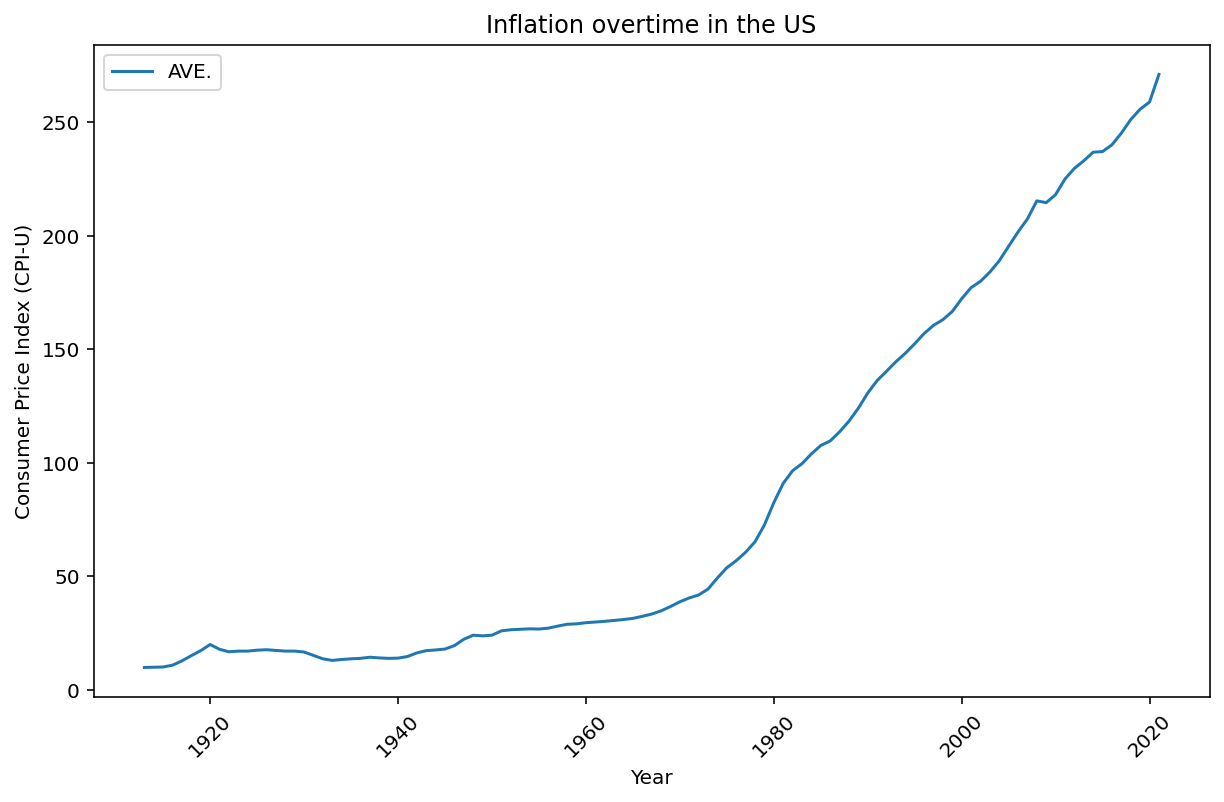

In [104]:
#Basic bar chart looking at life expectancy and how many countries share life expectancy ranges.

Inflation_df.plot( y='AVE.', x="YEAR" , kind="line" )
plt.title("Inflation overtime in the US")
plt.ylabel("Consumer Price Index (CPI-U)")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.show()

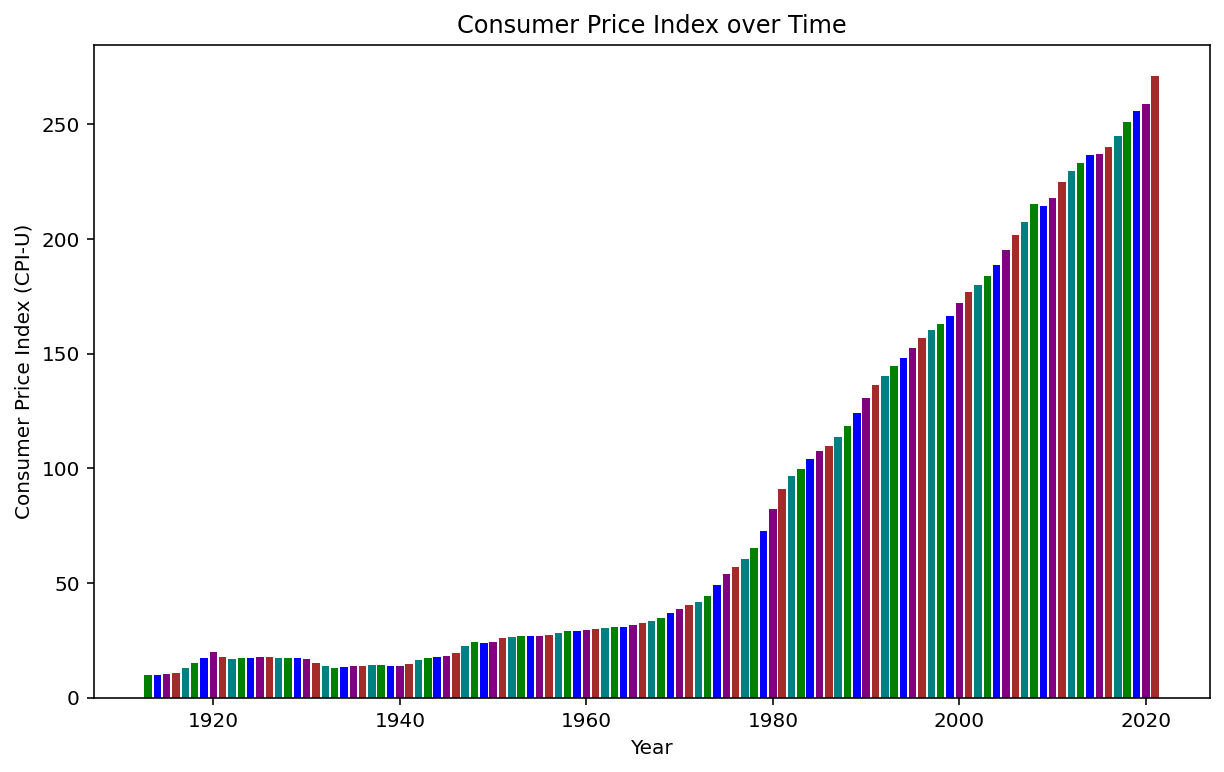

In [105]:
plt.bar(Inflation_df["YEAR"],Inflation_df["AVE."], color = ['green','blue','purple','brown','teal'])
plt.title('Consumer Price Index over Time')
plt.xlabel('Year')
plt.ylabel('Consumer Price Index (CPI-U)')
plt.show()

We can see that the Consumer Price Index (CPI-U) increases over time, but there are two distinct rates at which the increase occurs.

From the 1910s to the 1970s the CPI-U increased from on average 9 CPI-U points to 42 CPI-U points. This is an increase of 33 CPI-U points over 60 years which gives a rate of a .55 point increase.

From the 1970s to the 2020's the CPI-U increases from on average 44 CPI-U points to 271 CPI-U points. This is an increase of 227 CPI-U points over 50 years which gives a rate of 4.45 point increase.

The means, on average, items are becoming more expensive at a faster rate on the CPI-U scale.

Now let's bring in data regarding the average minimum wages for multiple years in the USA and see how this data looks. 
Data from: The Department of Labor, USA (https://www.dol.gov/agencies/whd/minimum-wage/history/chart)

# New Data

In [106]:
minimum_wage = {'YEAR': [1938, 1939, 1945, 1950, 1956, 1961, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1971, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1990, 1991, 1996, 1997, 2007, 2008, 2009, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], 'MinWage': [.25, .30, .40, .75, 1.00, 1.07, 1.125, 1.20, 1.25, 1.40, 1.60, 1.60, 1.60, 1.60, 2.00, 2.10, 2.30, 2.30, 2.65, 2.90, 3.10, 3.35, 3.80, 4.25, 4.75, 5.15, 5.85, 6.55, 7.25,  7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25]}
minimum_wage_df=pd.DataFrame.from_dict(minimum_wage)
minimum_wage_df

,YEAR,MinWage
0,1938,0.25
1,1939,0.30
2,1945,0.40
3,1950,0.75
4,1956,1.00
...,...,...
34,2017,7.25
35,2018,7.25
36,2019,7.25
37,2020,7.25


After we created a Dataframe for the minimum wage we can plot out data.

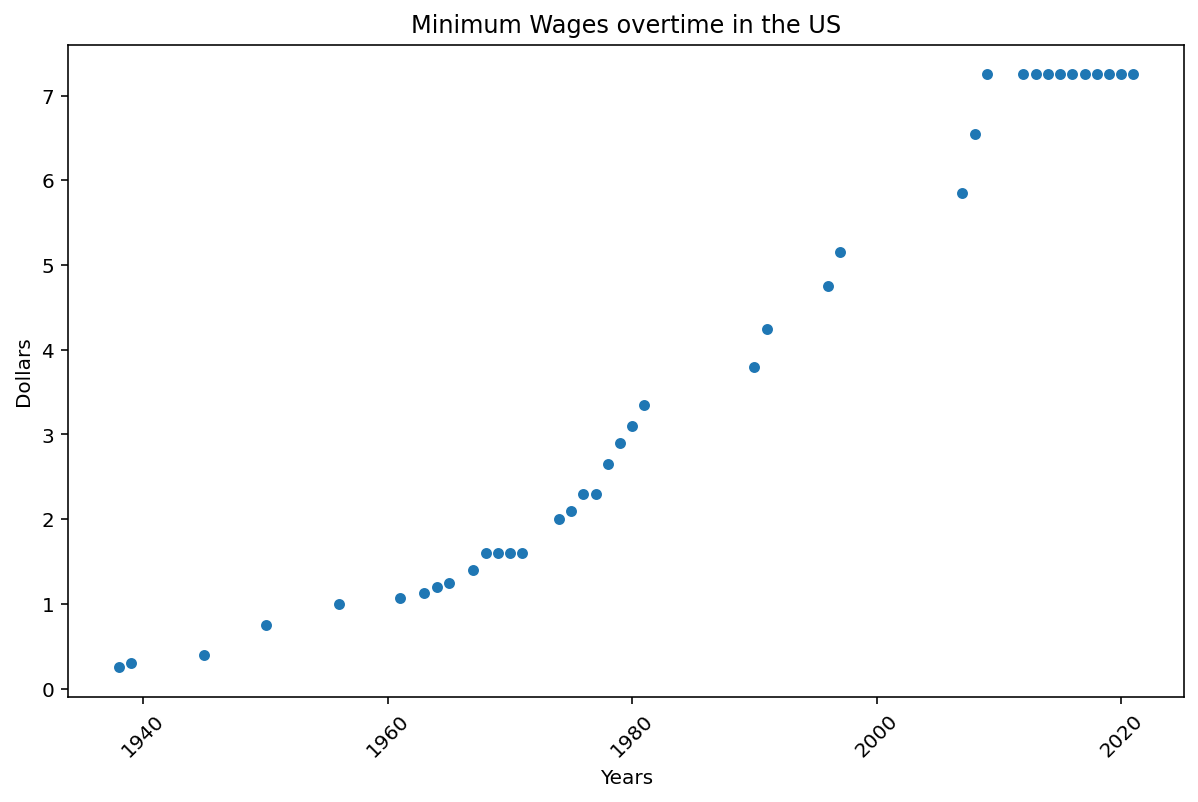

In [107]:
minimum_wage_df.plot( y='MinWage', x="YEAR" , kind="scatter" )
plt.title("Minimum Wages overtime in the US")
plt.xlabel("Years")
plt.xticks(rotation=45)
plt.ylabel("Dollars")
plt.show()

We can see that the rate of minimum wage is increasing and has taken sharp increases at faster rates than others. We can also notice that there has been no increase in the minimum wage since around 2010. 

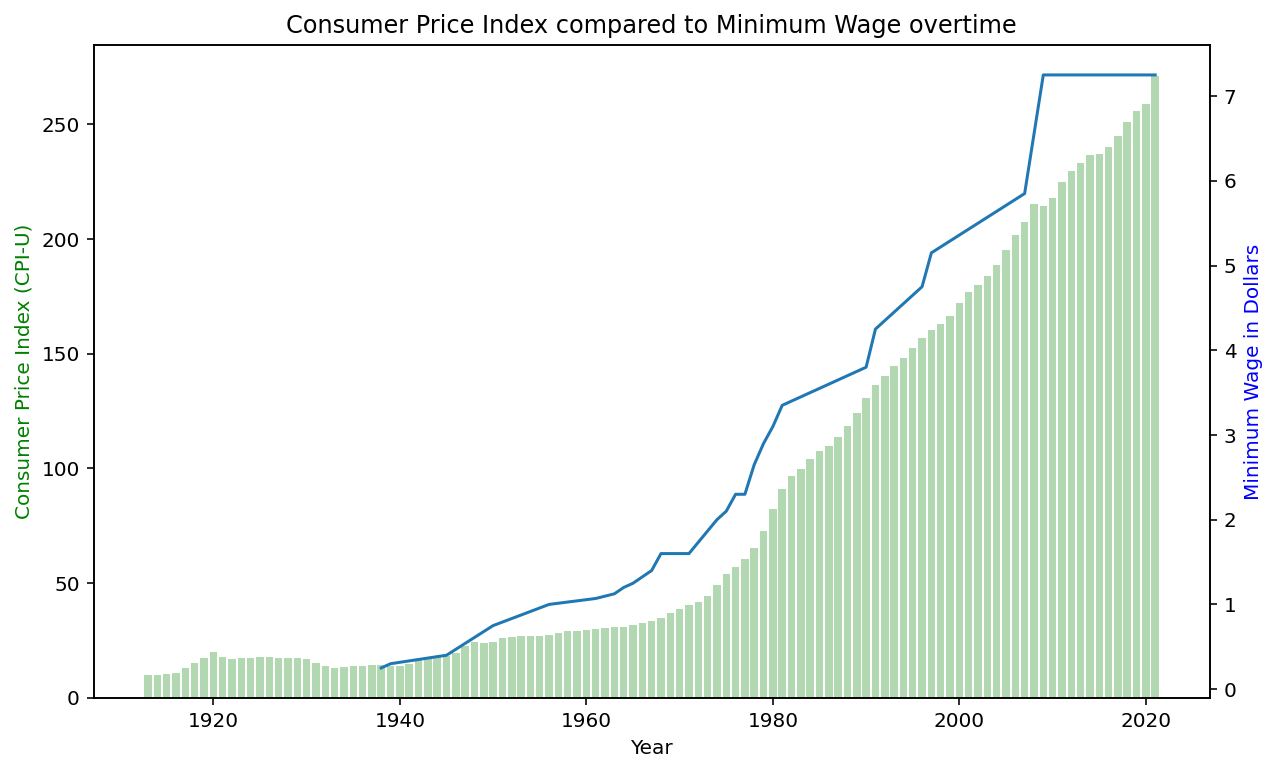

In [108]:
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

ax_left.bar(Inflation_df["YEAR"],Inflation_df["AVE."],alpha=0.3,color='g')
ax_right.plot(minimum_wage_df["YEAR"], minimum_wage_df['MinWage'])

plt.title('Consumer Price Index compared to Minimum Wage overtime')
ax_left.set_xlabel('Year')
ax_left.set_ylabel('Consumer Price Index (CPI-U)',color='g')
ax_right.set_ylabel('Minimum Wage in Dollars', color='b')
plt.show()


# Analysis

In [109]:
Inflation_df["AVE."].corr(minimum_wage_df['MinWage'])

0.5315703622659733

We can now see the rate of the minimum wage does increase and correlates with the increase in the Consumer Price Index.

The correlation rate of the Minimum wage to the Inflation Index is 53% which is a medium strength correlation where 0% means no correlation and 100% percent means a perfect correlation. This means that there is a relationship between the Minimum wage and the Consumer Price Index, but there is not a strong correlation.

We can consult https://hrdailyadvisor.blr.com/2015/06/11/how-does-cpi-relate-to-wage-increases/ to compare how the changes in the Consumer Price Index relate to Minimum wage.  

We can see that at the end of the 1930s through the 1940s the Consumer Price index was increasing at a higher rate than was the minimum wage. This would have put a struggle on the consumers trying to purchase items. 

Since the 1950's the Consumer Price Index did increase, but at a slower rate than the Minimum wage. This means more "bang-for-your-buck" or individuals could purchase more amounts of items as they had access to money compared to what they were used to back in the 1940s. 

Each time the minimum wage line moves further from the green bars, consumers will feel more relief from the prices of items, while each time the minimum wage line creeps closer to the green bars, consumers will feel more constricted in their purchases, and that prices are increasing too fast. 

While this is the case, we can see that the Consumer Price Index has caught up with the minimum wage. That means that while people are now making the same amount of money as they did years ago, the prices of items are still increasing. This would lead people to feel pressure on purchases the same as they did during World War II. 

# Conclusion and Future Studies

Based on this data, we can see that the minimum wage and the Consumer Price Index correlate fairly well but in the recent past, the Wages have not kept with the Inflation Index. This trend will cause consumers to not have as much money to purchase the same products they had in the past. Assuming each person would like to continue living their lives and making purchases as they had in the past, This trend will continue to cause problems for the average American.
It would be interesting to look at other countries and compare their wages and inflation index, and determine if this relationship is a worldwide occurrence, or if this is specifically an American issue.  